In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance_data = pd.read_csv('dataset/insurance.csv')
insurance_data.sample(10)

,age,sex,bmi,children,smoker,region,charges
917,45,male,22.895,0,yes,northeast,35069.37452
776,40,male,32.300,2,no,northwest,6986.69700
1174,29,male,32.110,2,no,northwest,4433.91590
782,51,male,35.970,1,no,southeast,9386.16130
507,21,male,23.750,2,no,northwest,3077.09550
605,51,female,34.100,0,no,southeast,9283.56200
414,19,female,35.150,0,no,northwest,2134.90150
169,27,male,18.905,3,no,northeast,4827.90495
1037,45,female,30.495,1,yes,northwest,39725.51805
1058,24,female,39.490,0,no,southeast,2480.97910


In [3]:
insurance_data.shape

(1338, 7)

In [4]:
insurance_data_correlation = insurance_data.corr()
insurance_data_correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


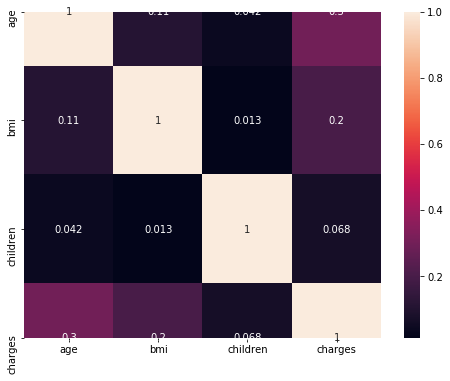

In [5]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(insurance_data_correlation, annot=True)

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

In [7]:
insurance_data['region'] = label_encoding.fit_transform(insurance_data['region'].astype(str))

In [8]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520


In [9]:
label_encoding.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [10]:
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker'])
insurance_data.head()

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,3,16884.92400,1,0,0,1
1,18,33.770,1,2,1725.55230,0,1,1,0
2,28,33.000,3,2,4449.46200,0,1,1,0
3,33,22.705,0,1,21984.47061,0,1,1,0
4,32,28.880,0,1,3866.85520,0,1,1,0


In [11]:
insurance_data.to_csv('dataset/insurance_preprocessed_new.csv', index=False)

In [12]:
x = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape

((1070, 8), (268, 8))

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [17]:
bag_reg = BaggingRegressor(
    DecisionTreeRegressor(),
    n_estimators=500,
    bootstrap=True, # With Replacement Accepted
    max_samples=0.8,
    n_jobs=-1, # Take all CPU core for training process
    oob_score=True
)
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [18]:
bag_reg.oob_score_

0.8381902343029722

In [19]:
from sklearn.metrics import r2_score
y_pred = bag_reg.predict(x_test)
print('R2 Score :', r2_score(y_test, y_pred))

R2 Score : 0.8537232764883502


In [20]:
bag_reg = BaggingRegressor(
    DecisionTreeRegressor(),
    n_estimators=500,
    bootstrap=False, # With Replacement Accepted
    max_samples=0.9,
    n_jobs=-1 # Take all CPU core for training process
)
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=F

In [23]:
y_pred = bag_reg.predict(x_test)
print('R2 Score :', r2_score(y_test, y_pred))

R2 Score : 0.8005074335450758
